In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choices
import LArDS50 as LAr

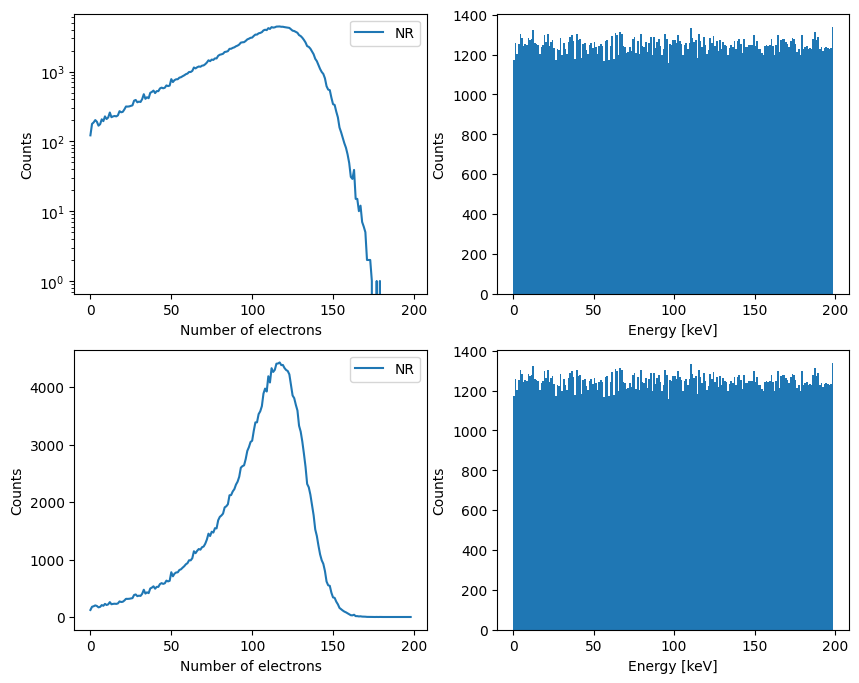

In [17]:
recoil_energies = np.random.uniform(0.05, 200, 250000)

nElectrons_NR = []
nElectrons_NR_eff = []
for E in recoil_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

    
hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 200))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 200))

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes[0,0].plot(bins[:-1], hist, label='NR')
# axes[0].plot(bins_eff[:-1], hist_eff, label='NR with efficiency', color='tab:red')
axes[0,0].set_xlabel('Number of electrons')
axes[0,0].set_ylabel('Counts')
axes[0,0].set_yscale('log')
# axes[0,0].set_xlim(0, 100)
axes[0,0].legend()

axes[0,1].hist(recoil_energies, bins=np.arange(0, 200))
axes[0,1].set_xlabel('Energy [keV]')
axes[0,1].set_ylabel('Counts')
# axes[0,1].set_yscale('log')

axes[1,0].plot(bins[:-1], hist, label='NR')
# axes[1].plot(bins_eff[:-1], hist_eff, label='NR with efficiency', color='tab:red')
axes[1,0].set_xlabel('Number of electrons')
axes[1,0].set_ylabel('Counts')
# axes[1,0].set_yscale('log')
# axes[1,0].set_xlim(0, 100)
axes[1,0].legend()


axes[1,1].hist(recoil_energies, bins=np.arange(0, 200))
axes[1,1].set_xlabel('Energy [keV]')
axes[1,1].set_ylabel('Counts')
plt.show()


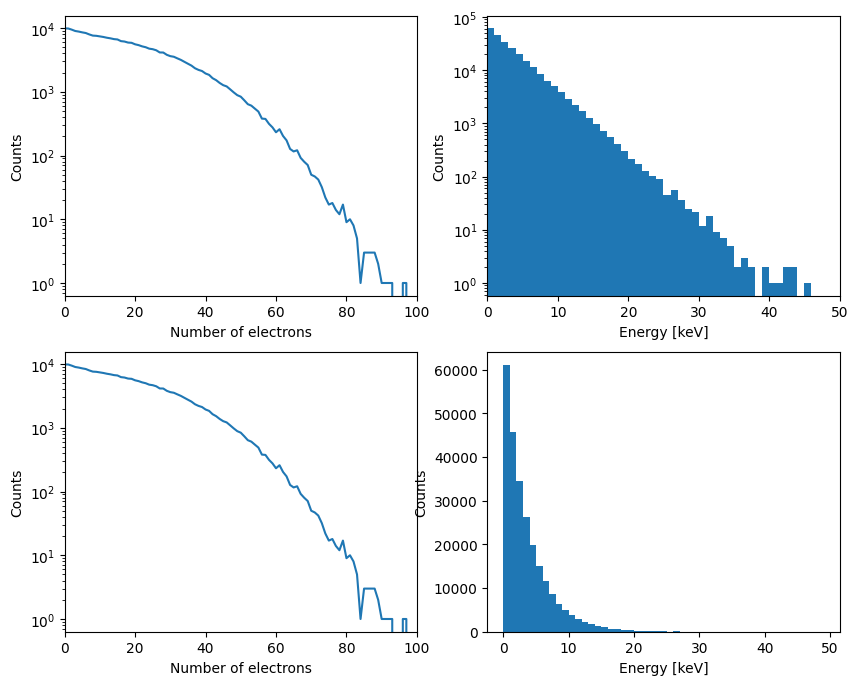

In [30]:
recoil_energies = np.random.exponential(scale=3.6, size=250000)
nElectrons_NR = []
nElectrons_NR_eff = []
for E in recoil_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

    
hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 100))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 100))

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes[0,0].plot(bins[:-1], hist, label='NR')
axes[0,0].set_xlabel('Number of electrons')
axes[0,0].set_ylabel('Counts')
axes[0,0].set_yscale('log')
axes[0,0].set_xlim(0, 100)

axes[0,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[0,1].set_xlabel('Energy [keV]')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim(0, 50)

axes[1,0].plot(bins[:-1], hist, label='NR')
axes[1,0].set_xlabel('Number of electrons')
axes[1,0].set_ylabel('Counts')
axes[1,0].set_yscale('log')
axes[1,0].set_xlim(0, 100)

axes[1,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[1,1].set_xlabel('Energy [keV]')
axes[1,1].set_ylabel('Counts')
plt.show()


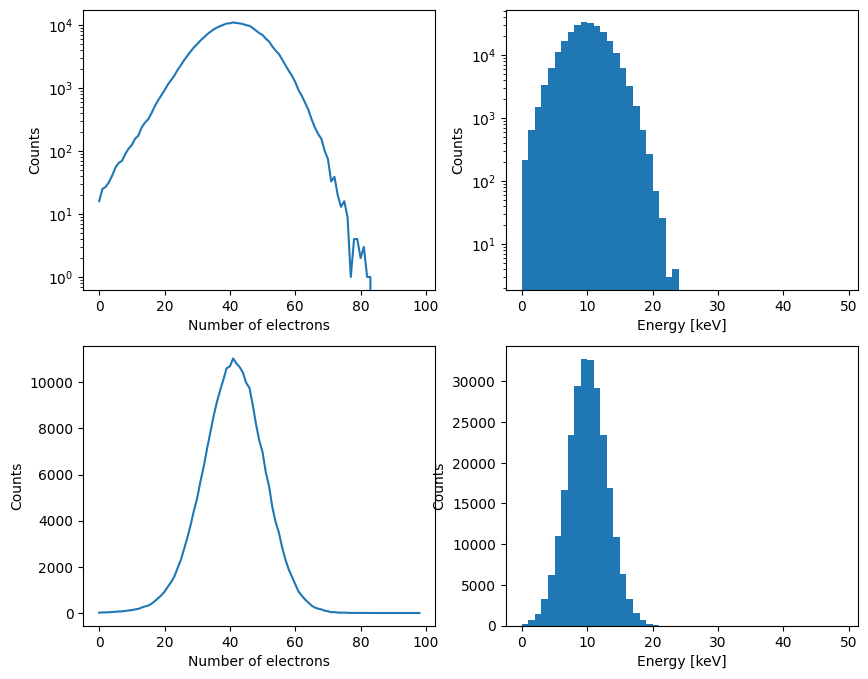

In [34]:
recoil_energies = []
rng = np.random.default_rng()
for _ in range(250000):
    E = rng.normal(loc=10, scale=3)
    while E < 0:
        E = rng.normal(loc=10, scale=3)
    recoil_energies.append(E)
recoil_energies = np.array(recoil_energies)

nElectrons_NR = []
nElectrons_NR_eff = []
for E in recoil_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

    
hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 100))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 100))

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes[0,0].plot(bins[:-1], hist, label='NR')
axes[0,0].set_xlabel('Number of electrons')
axes[0,0].set_ylabel('Counts')
axes[0,0].set_yscale('log')

axes[0,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[0,1].set_xlabel('Energy [keV]')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_yscale('log')

axes[1,0].plot(bins[:-1], hist, label='NR')
axes[1,0].set_xlabel('Number of electrons')
axes[1,0].set_ylabel('Counts')

axes[1,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[1,1].set_xlabel('Energy [keV]')
axes[1,1].set_ylabel('Counts')
plt.show()

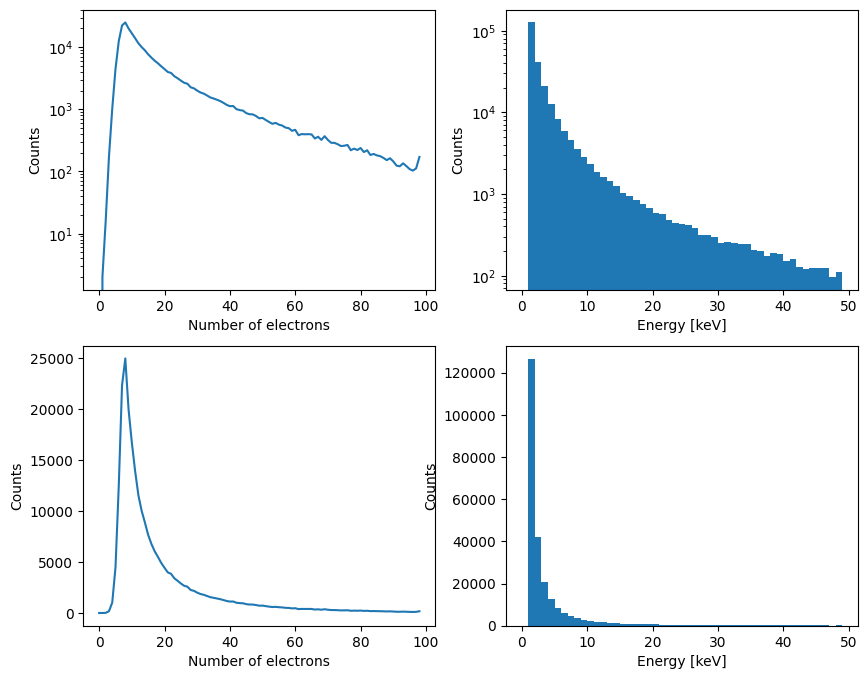

In [35]:
recoil_energies = []
rng = np.random.default_rng()
for _ in range(250000):
    # Generate x^-2 distribution by using inverse transform sampling
    # P(x) ~ x^-2, CDF: F(x) = -1/x + C
    # Inverse: x = 1/(1-u) where u is uniform random number
    u = rng.random()
    # Set range from 1 to 100 keV
    x_min = 1
    x_max = 100
    # Scale u to account for finite range
    u_scaled = u * (1/x_min - 1/x_max) + 1/x_max
    E = 1/u_scaled
    recoil_energies.append(E)
recoil_energies = np.array(recoil_energies)

nElectrons_NR = []
nElectrons_NR_eff = []
for E in recoil_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 100))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 100))

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes[0,0].plot(bins[:-1], hist, label='NR')
axes[0,0].set_xlabel('Number of electrons')
axes[0,0].set_ylabel('Counts')
axes[0,0].set_yscale('log')

axes[0,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[0,1].set_xlabel('Energy [keV]')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_yscale('log')

axes[1,0].plot(bins[:-1], hist, label='NR')
axes[1,0].set_xlabel('Number of electrons')
axes[1,0].set_ylabel('Counts')

axes[1,1].hist(recoil_energies, bins=np.arange(0, 50))
axes[1,1].set_xlabel('Energy [keV]')
axes[1,1].set_ylabel('Counts')
plt.show()


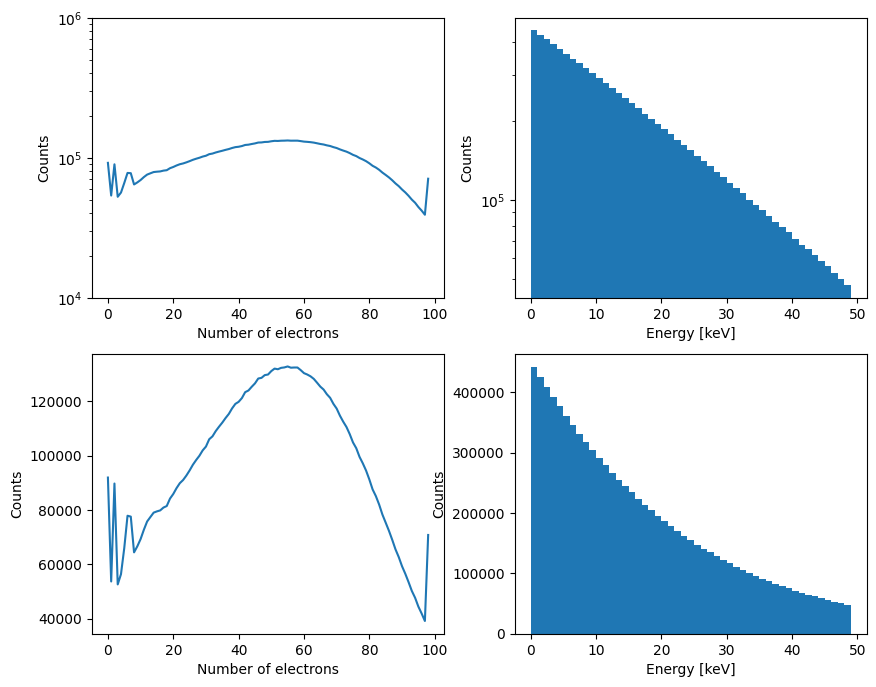

In [44]:
EventRate_file = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Argon/Ar50plTable.csv", skiprows=0,delimiter=',')
x_values = EventRate_file[:,0]  # nElectrons column
y_values = EventRate_file[:,1]  # events/electron/kg/day column
sampled_energies = choices(x_values, weights=y_values, k=10000000)

nElectrons_NR = []
nElectrons_NR_eff = []
for E in sampled_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

hist, bins = np.histogram(nElectrons_NR, bins=np.arange(0, 100))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, bins=np.arange(0, 100))

fig, axes = plt.subplots(2,2,figsize=(10, 8))
axes[0,0].plot(bins[:-1], hist, label='NR')
axes[0,0].set_xlabel('Number of electrons')
axes[0,0].set_ylabel('Counts')
axes[0,0].set_ylim(1E4, 1E6)
axes[0,0].set_yscale('log')

axes[0,1].hist(sampled_energies, bins=np.arange(0, 50))
axes[0,1].set_xlabel('Energy [keV]')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_yscale('log')

axes[1,0].plot(bins[:-1], hist, label='NR')
axes[1,0].set_xlabel('Number of electrons')
axes[1,0].set_ylabel('Counts')

axes[1,1].hist(sampled_energies, bins=np.arange(0, 50))
axes[1,1].set_xlabel('Energy [keV]')
axes[1,1].set_ylabel('Counts')
plt.show()


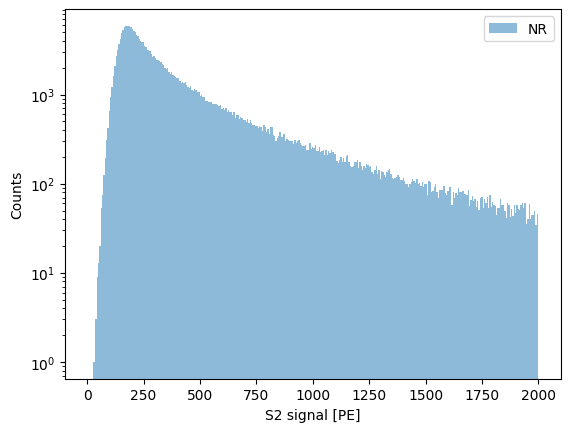

In [44]:
S2s_NR = []
for nElectrons in nElectrons_NR:
    S2s_NR.append(LAr.electronToS2(nElectrons))
    # print(nElectrons, LAr.electronToS2(nElectrons))

plt.hist(S2s_NR, bins=np.arange(0, 2000, 6), alpha=0.5, label='NR')
plt.legend()
plt.xlabel('S2 signal [PE]')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


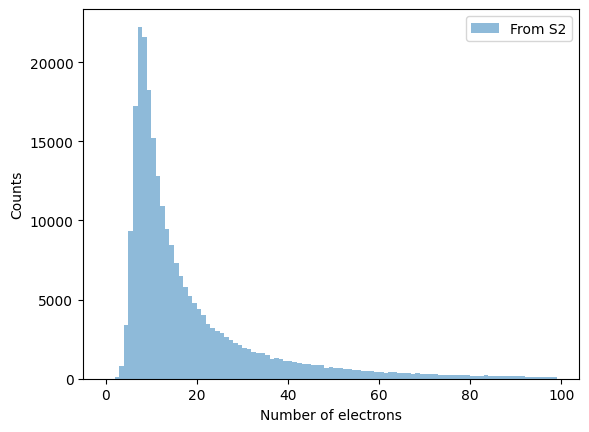

In [45]:
nElectronsFromS2 = []
for S2 in S2s_NR:
    nElectrons = S2/23
    nElectronsFromS2.append(nElectrons)

plt.hist(nElectronsFromS2, bins=np.arange(0, 100), alpha=0.5, label='From S2')
plt.legend()
plt.xlabel('Number of electrons')
plt.ylabel('Counts')
plt.show()


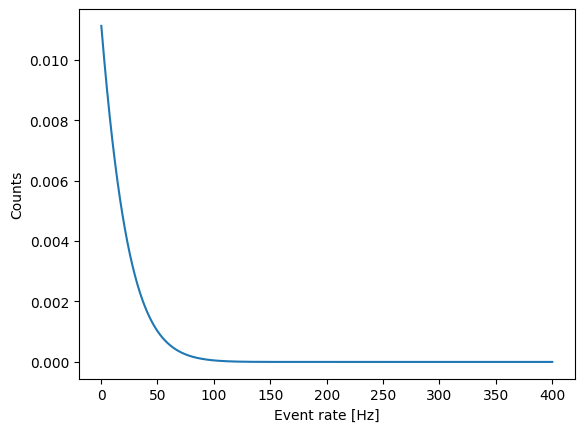

Total rate: 0.2387797458892795


In [23]:
EventRate_file = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Ar50zlTable.csv", skiprows=0,delimiter=',')
bin_center_eventRate, h_eventRate = EventRate_file[:,0], EventRate_file[:,1]
total_rate = np.trapz(h_eventRate, bin_center_eventRate)
bin_center_eventRate = bin_center_eventRate[bin_center_eventRate > 0]

fig, ax = plt.subplots()
ax.plot(bin_center_eventRate, h_eventRate)
ax.set_xlabel('Event rate [Hz]')
ax.set_ylabel('Counts')
plt.show()
print(f'Total rate: {total_rate}')

Total rate: 0.2387797458892795


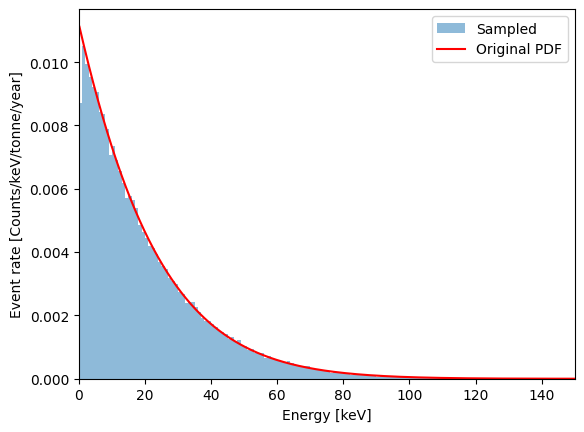

In [30]:
# Sample energies according to the event rate distribution
sampled_energies = choices(bin_center_eventRate, weights=h_eventRate, k=100000)

total_rate = np.trapz(h_eventRate, bin_center_eventRate)
print(f'Total rate: {total_rate}')

plt.hist(sampled_energies, bins=np.linspace(0, 150, 151,endpoint=True), density=False, weights=(total_rate/100000)*np.ones(100000), alpha=0.5, label='Sampled')
plt.plot(bin_center_eventRate, h_eventRate, 'r-', label='Original PDF')
plt.xlim(0, 150)
plt.xlabel('Energy [keV]')
plt.ylabel('Event rate [Counts/keV/tonne/year]')
plt.legend()
plt.show()


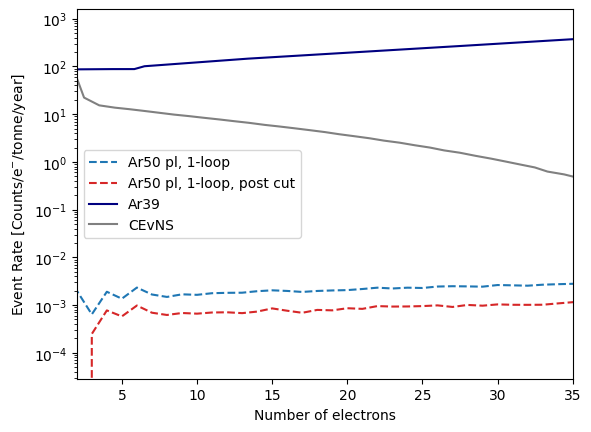

In [38]:
nElectrons_NR = []
nElectrons_NR_eff = []
for E in sampled_energies:
    nElectrons = LAr.energyToElectrons_NR(E)
    nElectrons_NR.append(nElectrons)
    eff = LAr.S2OnlyEfficiency(nElectrons)
    if np.random.binomial(1, eff) == 1:
        nElectrons_NR_eff.append(nElectrons)

hist, bins = np.histogram(nElectrons_NR, weights=(total_rate/100000)*np.ones_like(nElectrons_NR), bins=np.arange(0, 100))
hist_eff, bins_eff = np.histogram(nElectrons_NR_eff, weights=(total_rate/100000)*np.ones_like(nElectrons_NR_eff), bins=np.arange(0, 100))

Ar39_bg = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/Ar39_conservative_DSLM_afterCut.txt", skiprows=1, delimiter=',')
CEvNS_bg = np.loadtxt("/Users/yxu/workbenches/XeArLoopworkbench/CEvNS_EventRate_DS50_afterCut.txt", skiprows=1, delimiter=',')

fig, ax = plt.subplots()
ax.plot(bins[:-1], hist, label='Ar50 pl, 1-loop', ls='--')
ax.plot(bins_eff[:-1], hist_eff, label='Ar50 pl, 1-loop, post cut', color='tab:red', ls='--')
ax.plot(Ar39_bg[:,0], Ar39_bg[:,1]*1000*365.25, label='Ar39', color='navy', ls='-')
ax.plot(CEvNS_bg[:,0], CEvNS_bg[:,1]*1000*365.25, label='CEvNS', color='gray', ls='-')
ax.set_xlabel('Number of electrons')
ax.set_ylabel(r'Event Rate [Counts/e$^{-}$/tonne/year]')
ax.set_yscale('log')
ax.set_xlim(2, 35)
# ax.set_ylim(1E0, 1E5)
ax.legend()
plt.show()
